In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

2024-09-23 17:48:32.554895: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 17:48:32.908629: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 17:48:32.911316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 17:48:34.420891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
file_path = 'output'

In [3]:
name_class = os.listdir(file_path)
name_class

['real', 'fake']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['output/real/0006_face_8.png',
 'output/real/0045_face_4.png',
 'output/real/0012_face_8.png',
 'output/real/0034_face_4.png',
 'output/real/0041_face_3.png',
 'output/real/0030_face_4.png',
 'output/real/0017_face_8.png',
 'output/real/0040_face_1.png',
 'output/real/0022_face_4.png',
 'output/real/0030_face_3.png',
 'output/real/0009_face_8.png',
 'output/real/0019_face_1.png',
 'output/real/0045_face_1.png',
 'output/real/0029_face_8.png',
 'output/real/0000_face_2.png',
 'output/real/0003_face_2.png',
 'output/real/0041_face_5.png',
 'output/real/0030_face_10.png',
 'output/real/0035_face_4.png',
 'output/real/0041_face_9.png',
 'output/real/0034_face_10.png',
 'output/real/0013_face_2.png',
 'output/real/0044_face_9.png',
 'output/real/0018_face_5.png',
 'output/real/0026_face_4.png',
 'output/real/0021_face_7.png',
 'output/real/0007_face_6.png',
 'output/real/0012_face_5.png',
 'output/real/0044_face_5.png',
 'output/real/0006_face_7.png',
 'output/real/0010_face_2.png',
 'outp

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 

In [ ]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,output/real/0007_face_4.png,real
1,output/fake/0048_fake_face_5.png,fake
2,output/real/0029_face_1.png,real
3,output/real/0029_face_5.png,real
4,output/real/0031_face_5.png,real


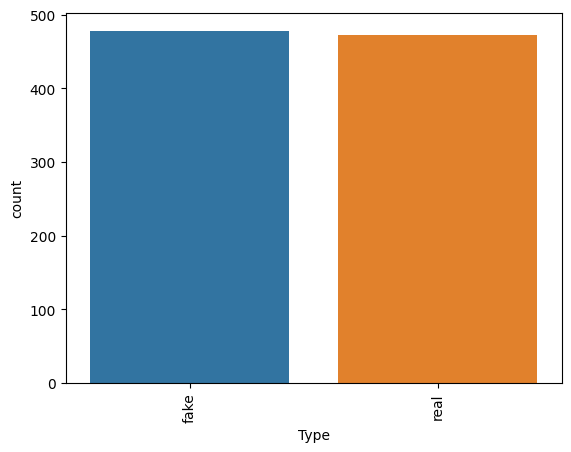

In [ ]:
#balancing
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

In [ ]:
test, val = train_test_split(test, test_size=0.50, random_state=42)

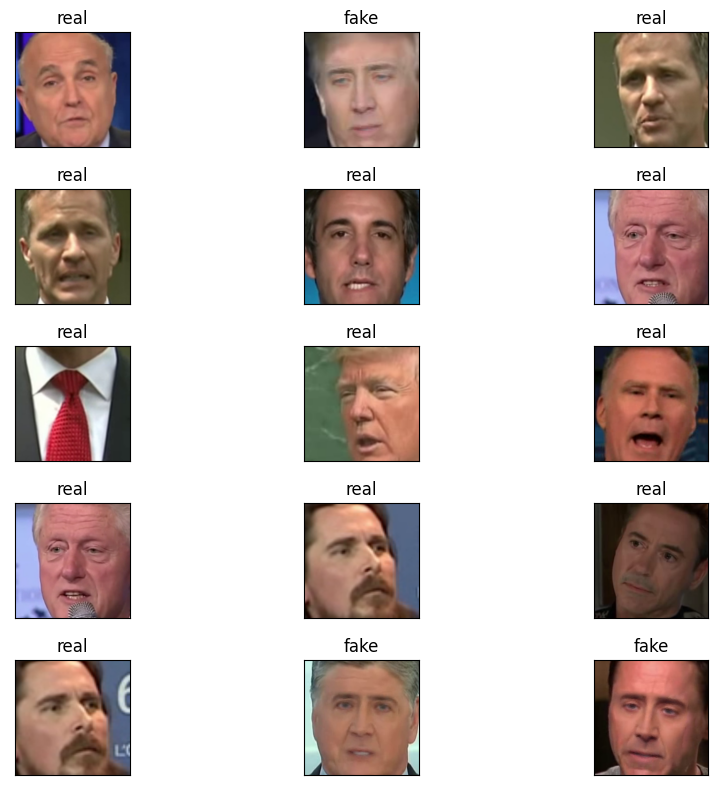

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=val,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 712 validated image filenames belonging to 2 classes.
Found 238 validated image filenames belonging to 2 classes.
Found 238 validated image filenames belonging to 2 classes.


In [15]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, Concatenate, Input
from tensorflow.keras.models import Model

# Load pretrained ResNet50
resnet50_model = ResNet50(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Load pretrained EfficientNetB0
efficientnet_model = EfficientNetB0(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze both pretrained models
resnet50_model.trainable = False
efficientnet_model.trainable = False

# Create inputs
inputs = Input(shape=(100, 100, 3))

# Pass inputs through both models
resnet_output = resnet50_model(inputs)
efficientnet_output = efficientnet_model(inputs)

# Concatenate outputs from both models
combined = Concatenate()([resnet_output, efficientnet_output])

# Add custom dense layers on top
x = Dense(128, activation='relu')(combined)
x = Dense(128, activation='relu')(x)

# Output layer for 2-class classification
outputs = Dense(2, activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model (optional)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 2048)         23587712    ['input_3[0][0]']                
                                                                                                  
 efficientnetb0 (Functional)    (None, 1280)         4049571     ['input_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 3328)         0           ['resnet50[0][0]',           

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [18]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25


2024-09-23 17:50:16.680211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-09-23 17:50:25.906172: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-09-23 17:50:26.022212: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-09-23 17:50:26.059249: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22151168 exceeds 10% of free system memory.
2024-09-23 17:50:26.086885: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2024-09-23 17:50:26.107643: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30720000 exceeds 10% of

23/23 [==============================] - ETA: 0s - loss: 0.7085 - accuracy: 0.6081

2024-09-23 17:51:02.404215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 66s 3s/step - loss: 0.7085 - accuracy: 0.6081 - val_loss: 0.4604 - val_accuracy: 0.7857
Epoch 2/25
23/23 [==============================] - 48s 2s/step - loss: 0.3889 - accuracy: 0.8174 - val_loss: 0.4283 - val_accuracy: 0.7857
Epoch 3/25
23/23 [==============================] - 47s 2s/step - loss: 0.2873 - accuracy: 0.8624 - val_loss: 0.3275 - val_accuracy: 0.8739
Epoch 4/25
23/23 [==============================] - 47s 2s/step - loss: 0.2107 - accuracy: 0.9101 - val_loss: 0.2646 - val_accuracy: 0.8824
Epoch 5/25
23/23 [==============================] - 50s 2s/step - loss: 0.1450 - accuracy: 0.9438 - val_loss: 0.3032 - val_accuracy: 0.8824
Epoch 6/25
23/23 [==============================] - 53s 2s/step - loss: 0.1303 - accuracy: 0.9424 - val_loss: 0.2896 - val_accuracy: 0.8866
Epoch 7/25
23/23 [==============================] - 51s 2s/step - loss: 0.1050 - accuracy: 0.9494 - val_loss: 0.2657 - val_accuracy: 0.8950
Epoch 8/25
23/23 [=============

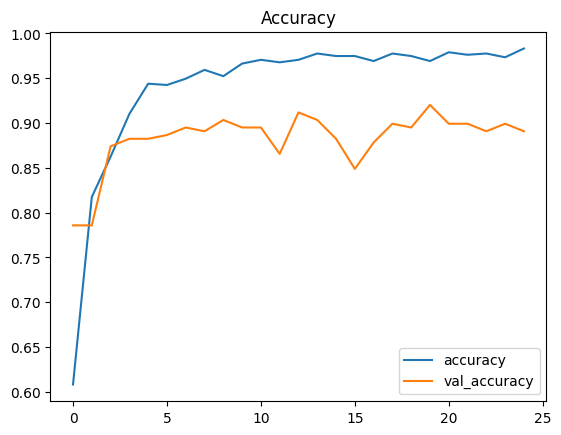

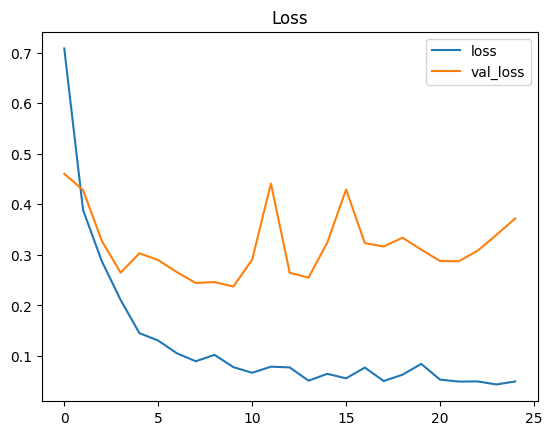

In [21]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [22]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

2024-09-23 18:33:52.060572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


    Test Loss: 0.37207
Test Accuracy: 89.08%


In [23]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

2024-09-23 18:34:04.841878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 14s 1s/step


In [24]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        fake       0.86      0.93      0.89       118
        real       0.93      0.85      0.89       120

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



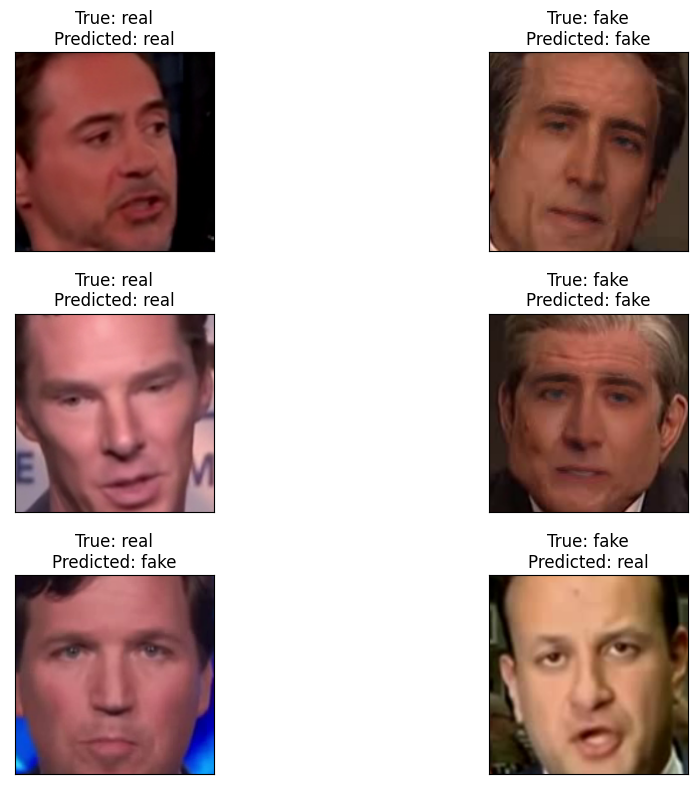

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [33]:
model.save_weights("model_resnet50_efficientnet_weights.h5")

In [38]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, Concatenate, Input
from tensorflow.keras.models import Model

# Rebuild the model architecture
resnet50_model = ResNet50(input_shape=(100, 100, 3), include_top=False, weights='imagenet', pooling='avg')
efficientnet_model = EfficientNetB0(input_shape=(100, 100, 3), include_top=False, weights='imagenet', pooling='avg')

# Freeze layers
resnet50_model.trainable = False
efficientnet_model.trainable = False

# Create inputs and ensemble architecture
inputs = Input(shape=(100, 100, 3))
resnet_output = resnet50_model(inputs)
efficientnet_output = efficientnet_model(inputs)
combined = Concatenate()([resnet_output, efficientnet_output])
x = Dense(128, activation='relu')(combined)
x = Dense(128, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model1 = Model(inputs=inputs, outputs=outputs)

# Load the weights
model1.load_weights("model_resnet50_efficientnet_weights.h5")


In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'a.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model1.predict(x)
print((result*100).astype('int'))

1/1 [==============================] - 3s 3s/step
[[  0 100]]


In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '0002_face_10.png'

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model1.predict(x)
print((result*100).astype('int'))



1/1 [==============================] - 0s 90ms/step
[[  0 100]]


In [41]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 100]


In [42]:
print("Largest element is:", max(pp))

Largest element is: 100


In [43]:
index = pp.index(max(pp))

In [44]:
name_class=["fake","real"]

In [45]:
name_class[index]

'real'

In [46]:
import matplotlib.pyplot as plt

In [47]:
plt.imread(img_path)

array([[[0.28235295, 0.2901961 , 0.2901961 ],
        [0.2509804 , 0.25882354, 0.25882354],
        [0.22352941, 0.2       , 0.19215687],
        ...,
        [0.18431373, 0.2784314 , 0.29411766],
        [0.18431373, 0.2784314 , 0.29411766],
        [0.2       , 0.27450982, 0.30588236]],

       [[0.27058825, 0.2784314 , 0.2784314 ],
        [0.23921569, 0.24705882, 0.24705882],
        [0.21960784, 0.19607843, 0.19215687],
        ...,
        [0.18431373, 0.2784314 , 0.29411766],
        [0.18431373, 0.2784314 , 0.29411766],
        [0.19607843, 0.27058825, 0.3019608 ]],

       [[0.27058825, 0.27058825, 0.27058825],
        [0.24313726, 0.24313726, 0.24313726],
        [0.22745098, 0.19607843, 0.1882353 ],
        ...,
        [0.1882353 , 0.27058825, 0.29803923],
        [0.19215687, 0.27450982, 0.3019608 ],
        [0.19607843, 0.27058825, 0.3019608 ]],

       ...,

       [[0.15294118, 0.24705882, 0.31764707],
        [0.15294118, 0.24705882, 0.31764707],
        [0.14901961, 0

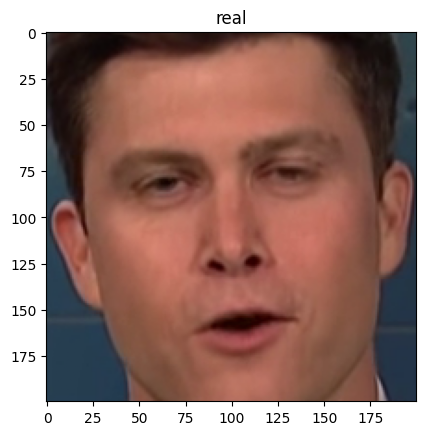

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()